## Alex Khvatov Capstone project

_This dataset contains features extracted from the Messidor image set to predict whether an image contains signs of diabetic retinopathy or not._

The data has been downloaded from [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/329/diabetic+retinopathy+debrecen) Diabetic Retinopathy Debrecen (Donated on 11/2/2014)

In [1]:
# Data has been downloaded 

#!cd data; wget https://archive.ics.uci.edu/static/public/329/diabetic+retinopathy+debrecen.zip -O diabetic+retinopathy+debrecen.zip
#!cd data; unzip -o diabetic+retinopathy+debrecen.zip
#!cd data; rm diabetic+retinopathy+debrecen.zip

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.copy_on_write = True

### Variables Table


| Variable Name	| Role	| Type	| Description	| Units	| Missing Values |
|---------------|-------|-------|---------------|-------|----------------|
| quality	    |Feature|Binary	|The binary result of quality assessment. 0 = bad quality 1 = sufficient quality.| |no|
|pre_screening  |Feature|Binary	|The binary result of pre-screening, where 1 indicates severe retinal abnormality and 0 its lack.| |no|
|ma1            |Feature|Integer| ma1 - ma-6 contain the results of MA detection. Each feature value stand for the number of MAs found at the confidence levels alpha = 0.5, . . . , 1, respectively.| |no|
|ma2	|Feature	|Integer		|	| |no|
|ma3	|Feature	|Integer		|	| |no|
|ma4	|Feature	|Integer		|	| |no|
|ma5	|Feature	|Integer		|	| |no|
|ma6	|Feature	|Integer		|	| |no|
|exudate1	|Feature	|Continuous	|exudate1 - exudate8 contain the same information as 2-7) for exudates. However, as exudates are represented by a set of points rather than the number of pixels constructing the lesions, these features are normalized by dividing the number of lesions with the diameter of the ROI to compensate different image sizes.		| |no|
|exudate2	|Feature	|Continuous	|		| |no|
|exudate3	|Feature	|Continuous	|		| |no|
|exudate3	|Feature	|Continuous	|		| |no|
|exudate5	|Feature	|Continuous	|		| |no|
|exudate6	|Feature	|Continuous	|		| |no|
|exudate7	|Feature	|Continuous	|		| |no|
|exudate8	|Feature	|Continuous	|		| |no|
|macula_opticdisc_distance	|Feature	|Continuous	|The euclidean distance of the center of the macula and the center of the optic disc to provide important information regarding the patient's condition. This feature is also normalized with the diameter of the ROI.	| |no|
|opticdisc_diameter	|Feature	|Continuous	|The diameter of the optic disc.		| |no|
|am_fm_classification	|Feature	|Binary	|The binary result of the AM/FM-based classification.		| |no|
|Class	|Target	|Binary	|Class label. 1 = contains signs of DR (Accumulative label for the Messidor classes 1, 2, 3), 0 = no signs of DR.		| |no|


### Additional Variable Information 

0) The binary result of quality assessment. 0 = bad quality 1 = sufficient quality.
1) The binary result of pre-screening, where 1 indicates severe retinal abnormality and 0 its lack.
2-7) The results of MA detection. Each feature value stand for the
number of MAs found at the confidence levels alpha = 0.5, . . . , 1, respectively.
8-15) contain the same information as 2-7) for exudates. However,
as exudates are represented by a set of points rather than the number of
pixels constructing the lesions, these features are normalized by dividing the
number of lesions with the diameter of the ROI to compensate different image
sizes.
16) The euclidean distance of the center of
the macula and the center of the optic disc to provide important information
regarding the patient's condition. This feature
is also normalized with the diameter of the ROI.
17) The diameter of the optic disc.
18) The binary result of the AM/FM-based classification.
19) Class label. 1 = contains signs of DR (Accumulative label for the Messidor classes 1, 2, 3), 0 = no signs of DR.

In [3]:
path_to_data = Path.resolve(Path("./data/messidor_features.arff"))

In [4]:
columns = [
    'quality',
    'pre_screening',
    'ma1',
    'ma2',
    'ma3',
    'ma4',
    'ma5',
    'ma6',
    'exudate1',
    'exudate2',
    'exudate3',
    'exudate4',
    'exudate5',
    'exudate6',
    'exudate7',
    'exudate8',
    'macula_opticdisc_distance',
    'opticdisc_diameter',
    'am_fm_classification',
    'class'
]

In [5]:
#Because the data file contains some additional information at the beginning of the file - we need to skip it.

df = pd.read_csv(path_to_data, skiprows=24, names=columns)

## Data Preparation

In [111]:
df.head().to_json(orient='records')

'[{"quality":"1","pre_screening":"1","ma1":22,"ma2":22,"ma3":22,"ma4":19,"ma5":18,"ma6":14,"exudate1":49.895756,"exudate2":17.775994,"exudate3":5.27092,"exudate4":0.771761,"exudate5":0.018632,"exudate6":0.006864,"exudate7":0.003923,"exudate8":0.003923,"macula_opticdisc_distance":0.486903,"opticdisc_diameter":0.100025,"am_fm_classification":"1","class":0},{"quality":"1","pre_screening":"1","ma1":24,"ma2":24,"ma3":22,"ma4":18,"ma5":16,"ma6":13,"exudate1":57.709936,"exudate2":23.799994,"exudate3":3.325423,"exudate4":0.234185,"exudate5":0.003903,"exudate6":0.003903,"exudate7":0.003903,"exudate8":0.003903,"macula_opticdisc_distance":0.520908,"opticdisc_diameter":0.144414,"am_fm_classification":"0","class":0},{"quality":"1","pre_screening":"1","ma1":62,"ma2":60,"ma3":59,"ma4":54,"ma5":47,"ma6":33,"exudate1":55.831441,"exudate2":27.993933,"exudate3":12.687485,"exudate4":4.852282,"exudate5":1.393889,"exudate6":0.373252,"exudate7":0.041817,"exudate8":0.007744,"macula_opticdisc_distance":0.53090

### Let's check for missing data

In [7]:
df.isnull().sum()

quality                      0
pre_screening                0
ma1                          0
ma2                          0
ma3                          0
ma4                          0
ma5                          0
ma6                          0
exudate1                     0
exudate2                     0
exudate3                     0
exudate4                     0
exudate5                     0
exudate6                     0
exudate7                     0
exudate8                     0
macula_opticdisc_distance    0
opticdisc_diameter           0
am_fm_classification         0
class                        0
dtype: int64

__There are no missing values__

### Let's check datatypes

In [8]:
df.dtypes

quality                        int64
pre_screening                  int64
ma1                            int64
ma2                            int64
ma3                            int64
ma4                            int64
ma5                            int64
ma6                            int64
exudate1                     float64
exudate2                     float64
exudate3                     float64
exudate4                     float64
exudate5                     float64
exudate6                     float64
exudate7                     float64
exudate8                     float64
macula_opticdisc_distance    float64
opticdisc_diameter           float64
am_fm_classification           int64
class                          int64
dtype: object

### Let's check for categorical variables

In [9]:
df.nunique()

quality                         2
pre_screening                   2
ma1                           110
ma2                           104
ma3                            99
ma4                            91
ma5                            84
ma6                            69
exudate1                     1141
exudate2                     1141
exudate3                     1130
exudate4                     1032
exudate5                      795
exudate6                      579
exudate7                      415
exudate8                      351
macula_opticdisc_distance    1132
opticdisc_diameter           1110
am_fm_classification            2
class                           2
dtype: int64

In [10]:
df["class"].unique()  # where 0 represents No signs of DR and 1 - presense of DR.

array([0, 1])

_Looks like we have three categorical variables that need to be converted to 'str' because Dict Vectorizer will not transform them_

In [11]:
categorical_columns = ['quality', 'pre_screening', 'am_fm_classification']
for c in categorical_columns:
    df[c] = df[c].astype(str)

### Let's split the data

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state=1)

In [14]:
df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

In [15]:
y_train = df_train['class'].values
y_val = df_val['class'].values
y_test = df_test['class'].values

In [16]:
del df_train['class']
del df_val['class']
del df_test['class']

## EDA (Exploratory Data Analysis)

In [17]:
df_full_train = df_full_train.reset_index(drop=True)

In [18]:
df_full_train.head()

,quality,pre_screening,ma1,ma2,ma3,ma4,ma5,ma6,exudate1,exudate2,exudate3,exudate4,exudate5,exudate6,exudate7,exudate8,macula_opticdisc_distance,opticdisc_diameter,am_fm_classification,class
0,1,1,37,35,30,19,17,10,24.503211,10.713234,2.160861,0.358074,0.195595,0.061059,0.008279,0.002070,0.531819,0.109699,1,1
1,1,1,42,35,30,23,17,9,168.777787,54.775579,18.557908,2.459469,0.196310,0.097646,0.037635,0.033566,0.535815,0.097646,1,1
2,1,1,55,55,54,54,52,42,15.792575,4.394227,0.382578,0.009293,0.000000,0.000000,0.000000,0.000000,0.508011,0.086738,0,0
3,1,1,24,24,24,21,17,14,61.474413,31.674601,13.543525,0.830872,0.099421,0.025362,0.020290,0.014203,0.477519,0.120725,1,0
4,1,1,4,4,4,4,4,4,109.049009,36.068906,9.763197,0.878155,0.000000,0.000000,0.000000,0.000000,0.495529,0.075827,1,0


In [19]:
df_full_train['class'].value_counts(normalize=True)

class
1    0.534783
0    0.465217
Name: proportion, dtype: float64

_In our dataset 53.4% of patients presented with the signs of Diabetic Retnopathy_

### Mean

In [20]:
global_dr_rate = df_full_train['class'].mean()

Because 'class' is a binary variable - the sum produces mean

#### Columns

In [21]:
categorical_columns #see above

['quality', 'pre_screening', 'am_fm_classification']

### Mutual information as a measure of relative importance of categorical variables

In [22]:
numeric_columns = ['ma1', 'ma2', 'ma3', 'ma4', 'ma5', 'ma6',
       'exudate1', 'exudate2', 'exudate3', 'exudate4', 'exudate5', 'exudate6',
       'exudate7', 'exudate8', 'macula_opticdisc_distance',
       'opticdisc_diameter']

### Feature Correlation (Pearson Correlation)

In [23]:
#In numerical features
df[numeric_columns].corrwith(df['class'])

ma1                          0.292603
ma2                          0.266338
ma3                          0.234691
ma4                          0.197511
ma5                          0.161631
ma6                          0.127861
exudate1                     0.058015
exudate2                     0.000479
exudate3                     0.038281
exudate4                     0.104254
exudate5                     0.142273
exudate6                     0.151424
exudate7                     0.184772
exudate8                     0.177313
macula_opticdisc_distance    0.008466
opticdisc_diameter          -0.030868
dtype: float64

### Conclusion

<u>background</u>

`ma1 - ma-6 contain the results of MA detection. Each feature value stand for the number of MAs found at the confidence levels alpha = 0.5, . . . , 1, respectively.`

`Exudates are represented by a set of points rather than the number of pixels constructing the lesions, these features are normalized by dividing the number of lesions with the diameter of the ROI to compensate different image sizes.`

<u>Conclusion</u>

MA detection has moderate correlation with the 'class', while some exudateX have no correlation.</br>
Optic Disc diameter has no correlation as well.


In [24]:
#In categorical features
for c in categorical_columns:
    print(f"{c.center(30)}")
    df_group = df_full_train.groupby(c)['class'].agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_dr_rate
    df_group['risk'] = df_group['mean'] / global_dr_rate
    display(df_group)
    print()
    print()

           quality            


,mean,count,diff,risk
quality,,,,
0,0.000000,2,-0.534783,0.000000
1,0.535948,918,0.001165,1.002179




        pre_screening         


,mean,count,diff,risk
pre_screening,,,,
0,0.700000,70,0.165217,1.308943
1,0.521176,850,-0.013606,0.974558




     am_fm_classification     


,mean,count,diff,risk
am_fm_classification,,,,
0,0.545902,610,0.011119,1.020792
1,0.512903,310,-0.021879,0.959087


### Conclusion

1. Good quality image allows for better diagnosis (Bad quality images do not contribute to the diagnosis)
2. Pre-screening also contributes to the diagnosis; lack of such - would not contribute.
3. Both classifications (AM/FM) contribute to the diagnosis almost equally

In [25]:
from sklearn.metrics import mutual_info_score
def mutual_info_diabetic_retnopathy_score(series):
    return mutual_info_score(series, df_full_train['class'])

In [26]:
mi = df_full_train[categorical_columns].apply(mutual_info_diabetic_retnopathy_score)
mi.sort_values(ascending=False)

pre_screening           0.004668
quality                 0.001666
am_fm_classification    0.000489
dtype: float64

### Conclusion

Categorical features affect the positive diagnois of DR very insignificantly.

## One-hot encoding (of categorical variables)

In [27]:
from sklearn.feature_extraction import DictVectorizer

In [28]:
dv = DictVectorizer(sparse=False)

In [29]:
train_dicts=df_train[categorical_columns + numeric_columns].to_dict(orient='records')

In [30]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [31]:
dv.get_feature_names_out()

array(['am_fm_classification=0', 'am_fm_classification=1', 'exudate1',
       'exudate2', 'exudate3', 'exudate4', 'exudate5', 'exudate6',
       'exudate7', 'exudate8', 'ma1', 'ma2', 'ma3', 'ma4', 'ma5', 'ma6',
       'macula_opticdisc_distance', 'opticdisc_diameter',
       'pre_screening=0', 'pre_screening=1', 'quality=0', 'quality=1'],
      dtype=object)

In [32]:
# Validation dictionaries
val_dicts = df_val[categorical_columns + numeric_columns].to_dict(orient='records')

In [33]:
X_val = dv.transform(val_dicts)

## Train logistic regression model

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=4)

In [36]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=4, solver='liblinear')

In [37]:
#selected threshold is 0.45 because of the study below:

y_pred = model.predict_proba(X_val)[:, 1]
y_decision = (y_pred >= 0.45)

In [38]:
accuracy = round((y_val == y_decision).mean(),3)
print(f"Answer: Accuracy {accuracy}")

Answer: Accuracy 0.791


In [39]:
def check_for_accuracy(c):
    model = LogisticRegression(solver='liblinear', C=c, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:, 1]
    y_decision = (y_pred >= 0.45)
    accuracy = round((y_val == y_decision).mean(),3)
    #print(f"Answer: Accuracy {accuracy}")
    return accuracy

In [40]:
accuracies = [(c, check_for_accuracy(c)) for c in [0.01, 0.1, 1, 10, 100]]
sorted_accuracies = sorted(accuracies, key=lambda x: x[1])
sorted_accuracies

[(0.01, np.float64(0.739)),
 (0.1, np.float64(0.77)),
 (10, np.float64(0.778)),
 (100, np.float64(0.787)),
 (1, np.float64(0.791))]

In our case best regularization parameter C is 1 (with the threshold 0.45 selected based on the study below)

In [41]:
dicts_full_train = df_full_train[categorical_columns + numeric_columns].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)
y_full_train = df_full_train['class'].values


logistic_regression_model = LogisticRegression(solver='liblinear', C=1, max_iter=1000, random_state=4)
logistic_regression_model.fit(X_full_train, y_full_train)

LogisticRegression(C=1, max_iter=1000, random_state=4, solver='liblinear')

In [42]:
dicts_test = df_test[categorical_columns + numeric_columns].to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [43]:
y_pred = logistic_regression_model.predict_proba(X_test)[:,1]

In [44]:
DR_prediction = (y_pred >= 0.45)
print(f"Accuracy of the final model: {(DR_prediction == y_test).mean()}")

Accuracy of the final model: 0.7012987012987013


### Let's check for accuracy using sklearn:

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
y_pred = logistic_regression_model.predict_proba(X_val)[:,1]

In [47]:
accuracy_score(y_val, y_pred >= 0.45)

0.7956521739130434

### Let's find the good threshold

In [48]:
threshholds = np.linspace(0, 1, 21)
scores = []

for t in threshholds:
    score = accuracy_score(y_val, y_pred >= t)
    scores.append(score)
    print("%.2f  %.3f" % (t, score))

0.00  0.535
0.05  0.535
0.10  0.543
0.15  0.574
0.20  0.613
0.25  0.678
0.30  0.730
0.35  0.757
0.40  0.783
0.45  0.796
0.50  0.787
0.55  0.765
0.60  0.770
0.65  0.743
0.70  0.717
0.75  0.704
0.80  0.696
0.85  0.683
0.90  0.665
0.95  0.630
1.00  0.465


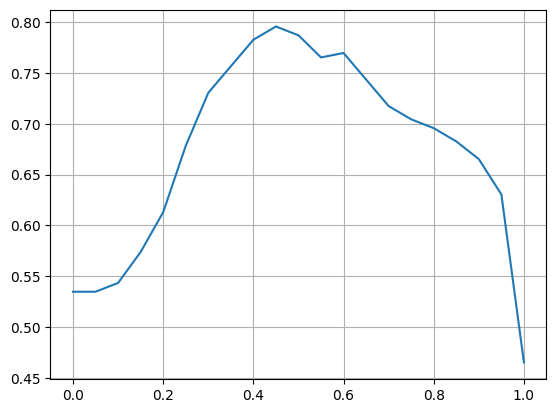

In [49]:
plt.subplots()
plt.plot(threshholds, scores)
plt.grid()

### Conclusion: Our model produces best accuracy when t=0.45

### Let's plot the ROC with sklearn

In [50]:
from sklearn.metrics import roc_curve

In [51]:
#making sure we are using the right 'y_pred'
y_pred = logistic_regression_model.predict_proba(X_val)[:,1]

In [52]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

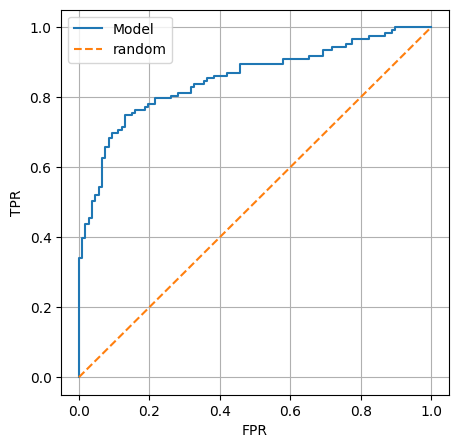

In [53]:
plt.figure(figsize=(5,5))

plt.plot(fpr, tpr, label="Model")
plt.plot([0,1], [0,1], label= 'random', linestyle='--')

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.grid()

### By the shape of the roc curve we may conclude that we have a good model

In [54]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from tqdm.auto import tqdm

In [55]:
roc_auc_score(y_val, y_pred)

np.float64(0.8530506800395107)

In [56]:
# Let's perform K-FOLD cross validation
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical_columns + numeric_columns].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train=dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=5000)
    model.fit(X_train, y_train)
    return dv, model

def predict(df, dv, model):
    dicts = df[categorical_columns + numeric_columns].to_dict(orient = "records")
    X=dv.transform(dicts)
    y_pred = model.predict_proba(X)[:,1]
    return y_pred

In [57]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]): 

    scores = []
    
    kfold = KFold(n_splits, shuffle=True, random_state=1)

    
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
    
        y_train = df_train['class'].values
        y_val = df_val['class'].values
        
        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)
        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.5f +- %.5f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.77062 +- 0.03473
C=0.01 0.81553 +- 0.03621
C=0.1 0.83123 +- 0.03274
C=0.5 0.83124 +- 0.03086
C=1 0.83112 +- 0.02984
C=5 0.83161 +- 0.02835
C=10 0.83213 +- 0.02861


### Final logistic regression model

In [58]:
# Comparing C=1 and C=5, we conclude C=1 gives the best performance
# Now we need to train our FINAL model on the full train dataset and evaluate on test dataset

dv, logistic_regression_model = train(df_full_train, df_full_train['class'].values, C=1)

y_pred = predict(df_test, dv, logistic_regression_model)

auc = roc_auc_score(y_test, y_pred)
print(f"Final logistic regression model {auc=:.4}")

Final logistic regression model auc=0.806


## Decision Tree model

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [60]:
train_dicts=df_train[categorical_columns + numeric_columns].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
y_train = df_train['class'].values
y_val = df_val['class'].values

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [61]:
for d in [1,2,3,4,5,6,10,15,20, None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)

    print('%4s -> %.3f' % (d, auc))

   1 -> 0.595
   2 -> 0.694
   3 -> 0.695
   4 -> 0.701
   5 -> 0.699
   6 -> 0.669
  10 -> 0.593
  15 -> 0.588
  20 -> 0.564
None -> 0.564


In [62]:
#Best tree depth is 4

In [63]:
#let's create a dataframe of different combinations of depth and min sample leaves.
scores = []

for d in [2,3,4,5,6, 7, 10, 15, 20, None]:
    for s in [1,2,5,10,15,20,50]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)
        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
    
        scores.append((d, s, auc))

In [64]:
columns=['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns = ['max_depth'], values=['auc'])
df_scores_pivot.round(4)

auc                                                  \
max_depth            NaN    2.0     3.0     4.0     5.0     6.0     7.0    
min_samples_leaf                                                           
1                 0.5711  0.6936  0.6946  0.7004  0.6851  0.6689  0.6617   
2                 0.5773  0.6936  0.6946  0.6966  0.6662  0.6516  0.6622   
5                 0.6141  0.6936  0.6936  0.6930  0.6690  0.6448  0.6479   
10                0.6415  0.6936  0.6877  0.6859  0.6687  0.6480  0.6547   
15                0.6726  0.6936  0.6877  0.6807  0.6968  0.6756  0.6919   
20                0.7083  0.6936  0.7029  0.7055  0.7178  0.7073  0.7116   
50                0.7269  0.6769  0.6973  0.7195  0.7264  0.7113  0.7269   

                                          
max_depth           10.0    15.0    20.0  
min_samples_leaf                          
1                 0.6356  0.5588  0.5551  
2                 0.6133  0.5658  0.5724  
5                 0.6191  0.6024  0.6090  
10                0.6233  0.6362  0.6295  
15                0.6798  0.6813  0.6690  
20                0.7076  0.7054  0.7054  
50                0.7269  0.7269  0.7269

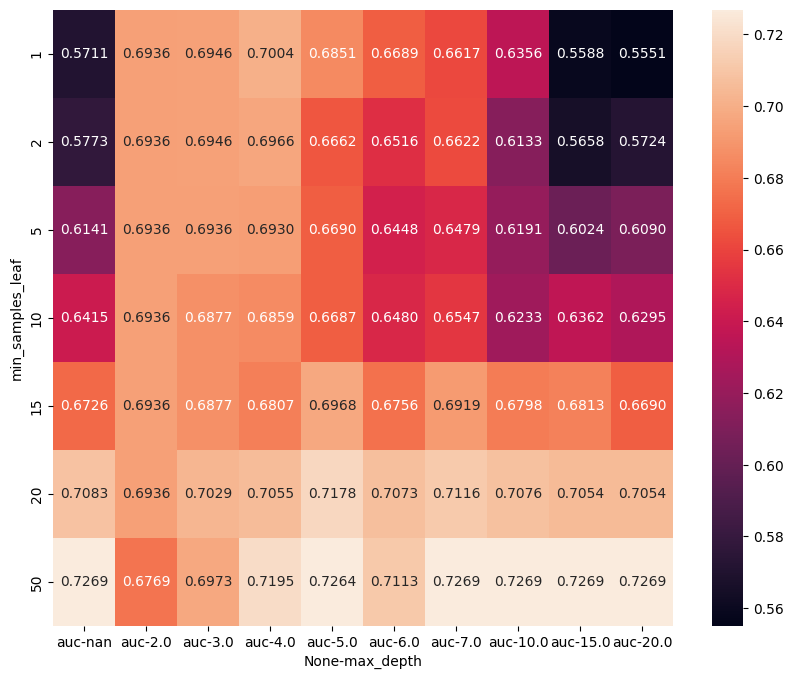

In [65]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_scores_pivot, annot=True, fmt='.4f')
plt.show()

#### The final decision tree classifier model should have 50 leafs and the max depth of 7

In [66]:
dt = DecisionTreeClassifier(max_depth=7, min_samples_leaf=50)
dt.fit(X_train, y_train)
y_pred = dt.predict_proba(X_val)[:,1]
print(f"Final DecisionTreeClassifier model {roc_auc_score(y_val, y_pred)=:.4}")

Final DecisionTreeClassifier model roc_auc_score(y_val, y_pred)=0.7269


## Let's now look at Ensembles and random forest

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
#we will try various number of n_estimators to pick the best-performing one

scores = []
for d in [2,3, 5 , 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((d, n, auc))

In [69]:
columns=["max_depth", "n_estimators","auc"]
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,n_estimators,auc
0,2,10,0.681640
1,2,20,0.682947
2,2,30,0.678907
3,2,40,0.675995
4,2,50,0.681996


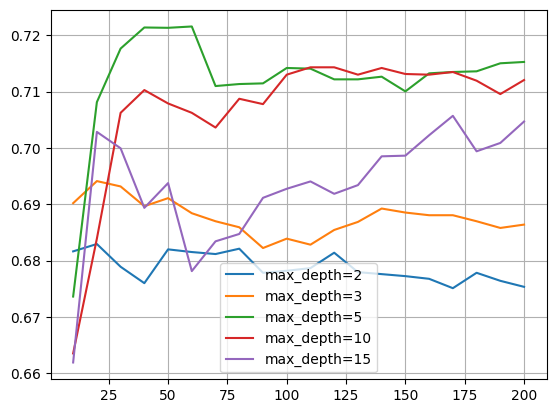

In [70]:
lines = []
for d in [2,3, 5 , 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    line, = plt.plot(df_subset.n_estimators, df_subset.auc, label=f"max_depth={d}")
    lines.append(line)
plt.legend(handles=lines)
plt.grid()

#### For this model the best to have max_depth=5

In [71]:
max_depth = 5 #best one

#We are limiting number of estimators to be within 5 to 45 as at this point the model performs best

scores = []
for s in [1,3,5,10,50]:
    for n in range(5, 46, 1):
        rf = RandomForestClassifier(n_estimators=n, max_depth=max_depth, random_state=1, min_samples_leaf=s)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((s, n, auc))

In [72]:
columns=["min_sample_leaf", "n_estimators","auc"]
df_scores = pd.DataFrame(scores, columns=columns)

In [73]:
colors = ['black', 'blue', 'orange', 'red', 'gray']
min_sample_leaf_values = [1,3,5,10,50]

list(zip(min_sample_leaf_values, colors))

[(1, 'black'), (3, 'blue'), (5, 'orange'), (10, 'red'), (50, 'gray')]

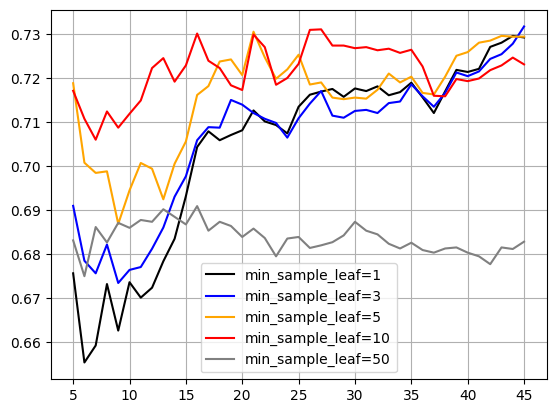

In [74]:
lines = []
for s, col in zip(min_sample_leaf_values, colors):
    df_subset = df_scores[df_scores.min_sample_leaf == s]
    line, = plt.plot(df_subset.n_estimators, df_subset.auc, label=f"min_sample_leaf={s}", color=col)
    lines.append(line)
plt.legend(handles=lines)
plt.grid()

#### Min_sample_leaf = 10 resulsts in the best model

### The final model

In [75]:
rf = RandomForestClassifier(n_estimators=13, max_depth=5, random_state=1, min_samples_leaf=10, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:,1]
print(f"Final DecisionTreeClassifier model {roc_auc_score(y_val, y_pred)=:.4}")

Final DecisionTreeClassifier model roc_auc_score(y_val, y_pred)=0.7245


## Gradient boosting and XGBoost

In [76]:
import xgboost as xgb
import re

from IPython.display import clear_output

In [77]:
def parse_output(output:str)->pd.DataFrame:
    #print(output)
    pattern = r"\[(\d+)\].+train-auc:([0-9.]+)\tval-auc:([0-9.]+)"
    results = []
    for line in output.strip().split('\n'):
        matches = re.findall(pattern, line)
        it, train, val = matches.pop()
        results.append((int(it), float(train), float(val)))
    return pd.DataFrame(results, columns=['num_iter', 'train_auc', 'val_auc'])

In [78]:
train_dicts=df_train[categorical_columns + numeric_columns].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
y_train = df_train['class'].values
y_val = df_val['class'].values

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [79]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

Lets include evaluation (watchlist) to monitor what is going on at each step

In [80]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [81]:
%%capture output

xgb_params = {
    'eta':0.1,
    'max_depth': 3,
    'min_child_weight':1,
    'subsample': 0.4,
    'objective':'binary:logistic',
    'seed':1,
    'verbosity':1,
    "eval_metric": 'auc'
}
    

model = xgb.train(xgb_params, dtrain, evals = watchlist, num_boost_round=200, verbose_eval=5)

In [82]:
s= output.stdout

In [83]:
df_score = parse_output(s)

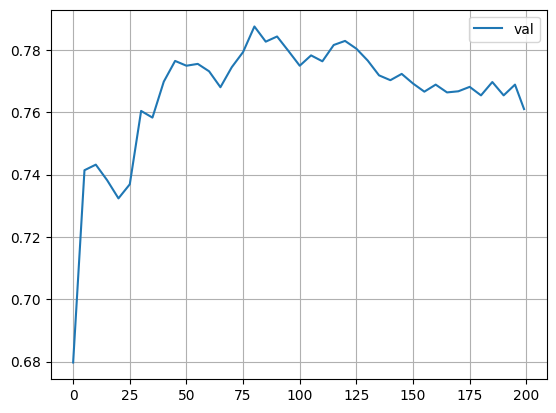

In [84]:
#plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()
plt.grid()

__Tuning the following parameters:__

* eta
* max_depth
* min_child_weight
* subsample

#### Let's tune ETA parameter

In [85]:
etas=['0.3', '1.0', '0.1', '0.05', '0.01']

In [86]:
%%capture output

for eta in etas:
    xgb_params = {
        'eta':eta,
         'max_depth': 6,
        'min_child_weight':1,
        
        'seed':1,
        'verbosity':1,
        
        'objective':'binary:logistic',
        "eval_metric": 'auc'
    }
    print(f"<<--eta={eta}-->>")
    model = xgb.train(xgb_params, dtrain, evals = watchlist, num_boost_round=200, verbose_eval=5)
    print("<<--end-->>")

In [87]:

def parse_outputs(output:str, key_name:str)->pd.DataFrame:
    scores={}
    results = []
    
    #print(output)
    pattern = r"\[(\d+)\].+train-auc:([0-9.]+)\tval-auc:([0-9.]+)"
    start_key_re = re.compile(f"<<--{key_name}=([0-9.]+)-->>").pattern
    
    end_key_re = r"<<--end-->>"
    
    current_key = ""
    for line in output.strip().split('\n'):
        matches = re.findall(start_key_re, line)
        if(matches):
            #found the beginning of a new eta
            current_key = matches.pop()
            results.clear()
            continue
        matches = re.findall(pattern, line)
        if(matches):
            it, train, val = matches.pop()
            results.append((int(it), float(train), float(val)))
            continue
        matches = re.findall(end_key_re, line)
        if(matches):
            scores[f'{key_name}={current_key}'] = pd.DataFrame(results, columns=['num_iter', 'train_auc', 'val_auc'])
    
    return scores

In [88]:
scores_etas = parse_outputs(output.stdout, 'eta')

In [89]:
scores_etas.keys()

dict_keys(['eta=0.3', 'eta=1.0', 'eta=0.1', 'eta=0.05', 'eta=0.01'])

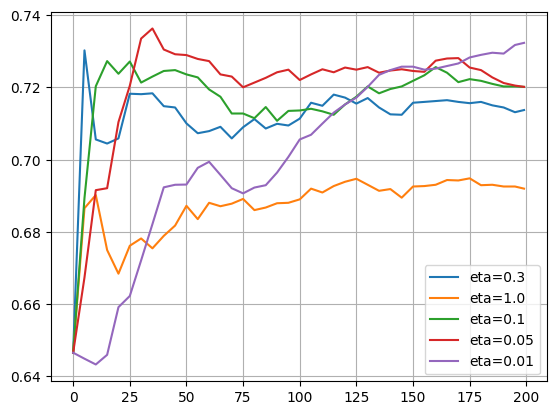

In [90]:
for eta in scores_etas.keys():
    df_score = scores_etas[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
plt.legend()
plt.grid()

Based on the graphs produced the best eta is __0.05__ with 200 iterations. Other eta parameter values do not perform as good.

#### Tuning max_depth

In [91]:
max_depth_values = [2,3,5,7,9,10]

In [92]:
%%capture output

for md in max_depth_values:
    xgb_params = {
        'eta':0.05,
        'max_depth': md,
        'min_child_weight':1,
        
        'seed':1,
        'verbosity':1,
        
        'objective':'binary:logistic',
        "eval_metric": 'auc'
    }
    print(f"<<--max_depth={md}-->>")
    model = xgb.train(xgb_params, dtrain, evals = watchlist, num_boost_round=200, verbose_eval=5)
    print("<<--end-->>")

In [93]:
scores_max_depth = parse_outputs(output.stdout, 'max_depth')

In [94]:
scores_max_depth.keys()

dict_keys(['max_depth=2', 'max_depth=3', 'max_depth=5', 'max_depth=7', 'max_depth=9', 'max_depth=10'])

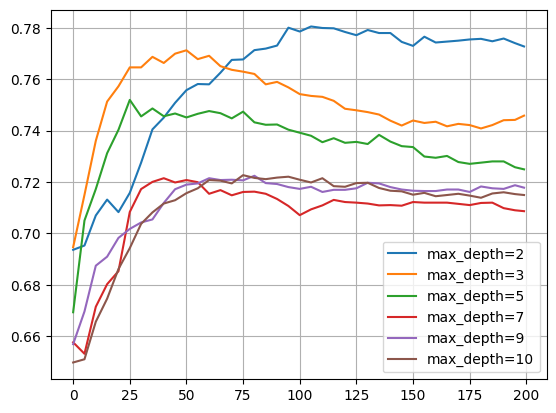

In [95]:
for max_depth in scores_max_depth.keys():
    df_score = scores_max_depth[max_depth]
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)
plt.legend()
plt.grid()

Conclusion: we have experimented with various max_depth values - best-performing one is __max_depth=2__, it reachers maximum (0.78) at around 110 iteration.

#### Tuning min child weight

In [96]:
min_child_weight = [3, 5, 7, 10]
min_child_weight

[3, 5, 7, 10]

In [97]:
%%capture output

for mcw in min_child_weight:
    xgb_params = {
        'eta':0.05,
        'max_depth': 2,
        'min_child_weight':mcw,
        
        'seed':1,
        'verbosity':1,
        
        'objective':'binary:logistic',
        "eval_metric": 'auc'
    }
    print(f"<<--min_child_weight={mcw}-->>")
    model = xgb.train(xgb_params, dtrain, evals = watchlist, num_boost_round=200, verbose_eval=5)
    print("<<--end-->>")

In [98]:
scores_min_child_weight = parse_outputs(output.stdout, 'min_child_weight')
scores_min_child_weight.keys()

dict_keys(['min_child_weight=3', 'min_child_weight=5', 'min_child_weight=7', 'min_child_weight=10'])

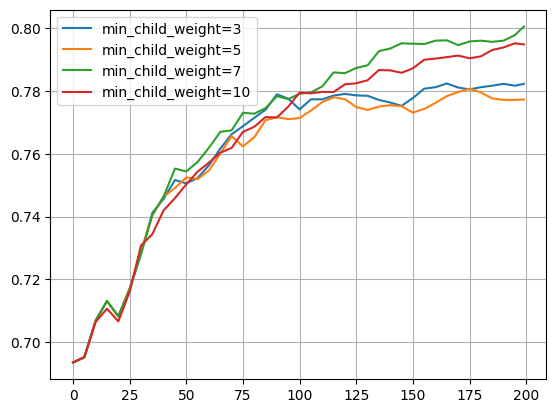

In [99]:
for mcw in scores_min_child_weight.keys():
    df_score = scores_min_child_weight[mcw]
    plt.plot(df_score.num_iter, df_score.val_auc, label=mcw)
plt.legend()
plt.grid()

Conclusion: we have rejected 1 and 12 (not pictured on the graph or in the code) to minimize the number of graphs, but these values produced the worse results. Based on the study __min_child_weight=7__ performed the best

#### Tuning subsample

In [100]:
subsample = [ 0.4, 1, 0.5, 0.6]
#eliminating 0.2, 0.3, 0.8, due to producing degrading results

In [101]:
%%capture output

for subs in subsample:
    xgb_params = {
        'eta':0.05,
        'max_depth': 2,
        'min_child_weight':7,
        'subsample': subs,
        
        'seed':1,
        'verbosity':1,
        
        'objective':'binary:logistic',
        "eval_metric": 'auc'
    }
    print(f"<<--subsample={subs}-->>")
    model = xgb.train(xgb_params, dtrain, evals = watchlist, num_boost_round=200, verbose_eval=5)
    print("<<--end-->>")

In [102]:
scores_subsample = parse_outputs(output.stdout, 'subsample')
scores_subsample.keys()

dict_keys(['subsample=0.4', 'subsample=1', 'subsample=0.5', 'subsample=0.6'])

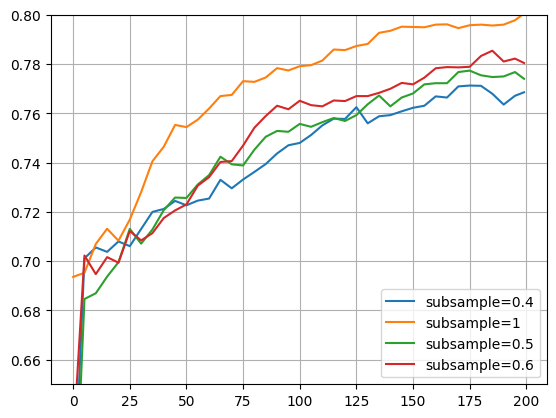

In [103]:
for subs in scores_subsample.keys():
    df_score = scores_subsample[subs]
    plt.plot(df_score.num_iter, df_score.val_auc, label=subs)
plt.legend()
plt.ylim(0.65, 0.8)
plt.grid()

Conclusion: we experimented with various subsample values - the best overall is __subsample=1__

#### Let's tune alpha

In [104]:
alpha = [0, 0.01, 0.1, 0.5, 1]
# eliminated 2, 100, 5, 10 due to producing an unsatisfactory results

In [105]:
%%capture output

for a in alpha:
    xgb_params = {
        'eta':0.05,
        'max_depth': 2,
        'min_child_weight':7,
        'subsample': 1,
        'alpha': a,
        
        'seed':1,
        'verbosity':1,
        
        'objective':'binary:logistic',
        "eval_metric": 'auc'
    }
    print(f"<<--alpha={a}-->>")
    model = xgb.train(xgb_params, dtrain, evals = watchlist, num_boost_round=200, verbose_eval=5)
    print("<<--end-->>")

In [106]:
scores_alpha = parse_outputs(output.stdout, 'alpha')
scores_alpha.keys()

dict_keys(['alpha=0', 'alpha=0.01', 'alpha=0.1', 'alpha=0.5', 'alpha=1'])

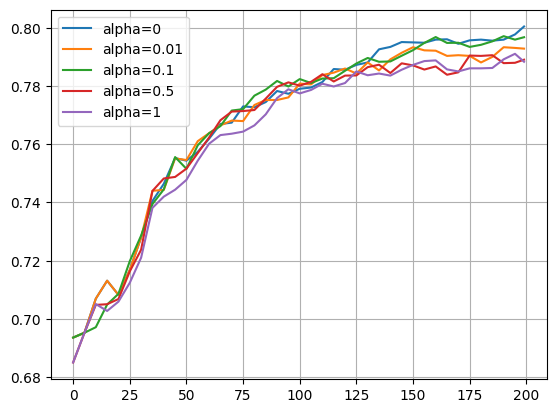

In [107]:
for a in scores_alpha.keys():
    df_score = scores_alpha[a]
    plt.plot(df_score.num_iter, df_score.val_auc, label=a)
plt.legend()
#plt.ylim(0.9, 0.95)
plt.grid()

Conclusion: we experimented with various alpha values - the best overall is __alpha=0__

In [108]:
xgb_params = {
        'eta':0.05,
        'max_depth': 2,
        'min_child_weight':7,
        'subsample': 1,
        'alpha': 0,
        
        'seed':1,
        'verbosity':1,
        
        'objective':'binary:logistic',
        "eval_metric": 'auc'
    }
model = xgb.train(xgb_params, dtrain, evals = watchlist, num_boost_round=150, verbose_eval=5)

[0]	train-auc:0.67834	val-auc:0.69358
[5]	train-auc:0.71615	val-auc:0.69525
[10]	train-auc:0.74738	val-auc:0.70695
[15]	train-auc:0.76500	val-auc:0.71313
[20]	train-auc:0.76336	val-auc:0.70826
[25]	train-auc:0.76682	val-auc:0.71682
[30]	train-auc:0.77271	val-auc:0.72799
[35]	train-auc:0.77884	val-auc:0.74052
[40]	train-auc:0.78596	val-auc:0.74641
[45]	train-auc:0.79074	val-auc:0.75526
[50]	train-auc:0.79613	val-auc:0.75437
[55]	train-auc:0.80250	val-auc:0.75740
[60]	train-auc:0.80926	val-auc:0.76191
[65]	train-auc:0.81298	val-auc:0.76696
[70]	train-auc:0.81470	val-auc:0.76744
[75]	train-auc:0.81772	val-auc:0.77302
[80]	train-auc:0.82040	val-auc:0.77273
[85]	train-auc:0.82221	val-auc:0.77451
[90]	train-auc:0.82785	val-auc:0.77831
[95]	train-auc:0.82918	val-auc:0.77736
[100]	train-auc:0.83245	val-auc:0.77908
[105]	train-auc:0.83567	val-auc:0.77950
[110]	train-auc:0.83880	val-auc:0.78140
[115]	train-auc:0.84340	val-auc:0.78586
[120]	train-auc:0.84528	val-auc:0.78562
[125]	train-auc:0.8476

In [109]:
y_pred = model.predict(dval)
print(f"Final DecisionTreeClassifier model {roc_auc_score(y_val, y_pred)=:.4}")

Final DecisionTreeClassifier model roc_auc_score(y_val, y_pred)=0.7937


Conclusion: At 150 iterations our XGBoost model on validation dataset ROC is 0.7937

## Comparison of the models created and tuned

|Model Name|ROC_AUC_SCORE|
|----------|:-------------:|
|Logistic regression|0.806|
|Decision Tree|0.7269|
|Random forest|0.7245|
|XGBoost|0.7937|

#### Logistic Regression model has produced the best score and will be used as a model to be served in our Web Service

## Docker image and a Web Service

Please see [train.py](train.py) in order to create and save a trained model to disk (pickle).

[predict.py](predict.py) is used inside the docker image to run the webservice.

The [Dockerfile](Dockerfile) included used to build the Docker image uploaded to Docker hub. You may just pull the docker image or recreate it yourself by running the following command<br/> `docker build -t khvatov/zoomcamp-capstone-ak:1.0.0 .` <br/>given you are in midterm directory, have installed the required libraries via pipenv install and executed python train.py in order to retrain and save the model. I have included the model.bin just in case.

You may run this Docker image using `docker run -p 9696:9696 khvatov/zoomcamp-capstone-ak:1.0.0`

I also created a [web_client.ipynb](web_client.ipynb) to interact with the webservice once it is launched locally or remotely (you will need to adjust the address if running Docker container remotely).